In [420]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

# 1. EDA and Data Pre-processing

## 1.1 Data overview

In [421]:
train_df = pd.read_csv("./data/train.csv");
test_df = pd.read_csv("./data/test.csv");

In [422]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [423]:
train_df.dtypes[train_df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

## 1.2 Outliers Detection and Cleaning

In [424]:
outliers_to_remove = []

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

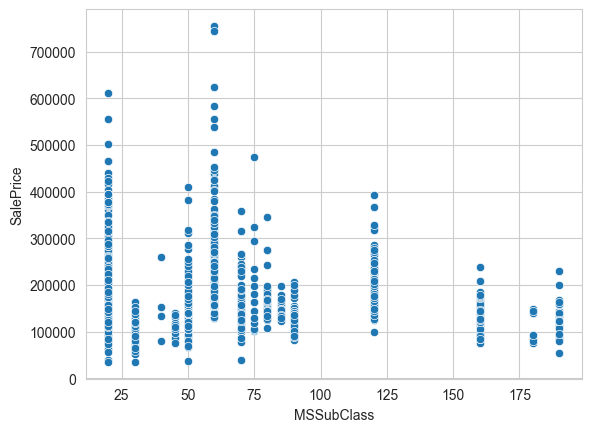

In [425]:
sns.scatterplot(data=train_df, x="MSSubClass", y="SalePrice")

In [426]:
train_df.query("SalePrice>700_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [427]:
outliers_to_remove.append(691);
outliers_to_remove.append(1182); # abnormal sale condition
print(outliers_to_remove)

[691, 1182]


<Axes: xlabel='MSZoning', ylabel='SalePrice'>

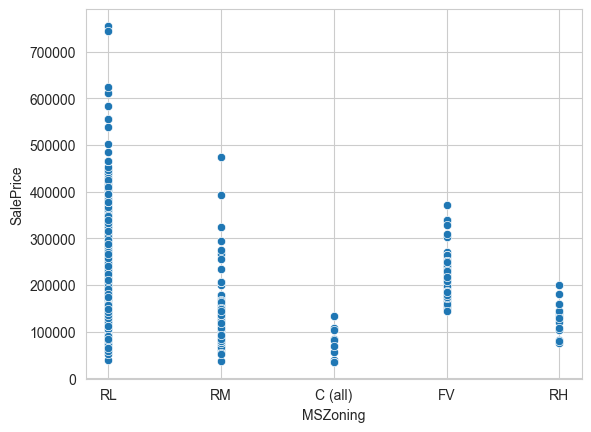

In [428]:
sns.scatterplot(data=train_df, x="MSZoning", y="SalePrice")

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

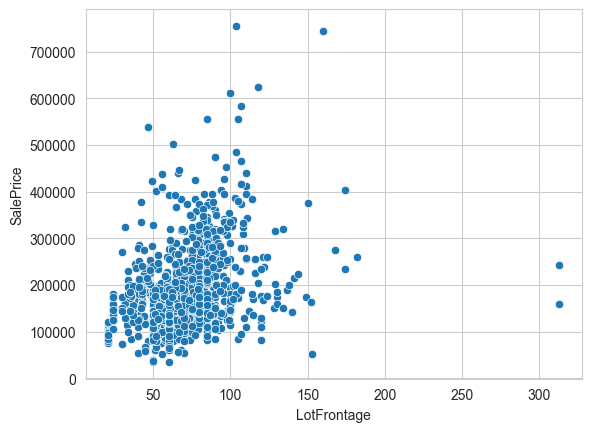

In [429]:
sns.scatterplot(data=train_df, x="LotFrontage", y="SalePrice")

In [430]:
train_df.query("LotFrontage>250")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [431]:
outliers_to_remove.append(934)
outliers_to_remove.append(1298)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

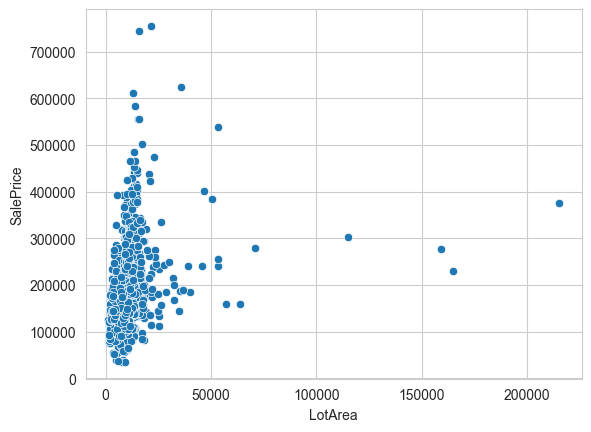

In [432]:
sns.scatterplot(data=train_df, x="LotArea", y="SalePrice")

In [433]:
train_df.query("LotArea>60_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [434]:
outliers_to_remove.append(249)
outliers_to_remove.append(313)
outliers_to_remove.append(335)
outliers_to_remove.append(451)
outliers_to_remove.append(706)
outliers_to_remove.append(1298)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

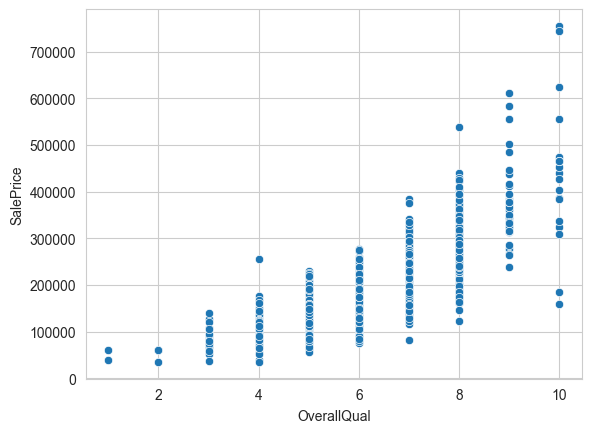

In [435]:
sns.scatterplot(data=train_df, x="OverallQual", y="SalePrice")

In [436]:
stats.zscore(train_df["OverallQual"]).sort_values().tail(10)

994     2.821425
1169    2.821425
1373    2.821425
691     2.821425
440     2.821425
58      2.821425
591     2.821425
583     2.821425
523     2.821425
515     2.821425
Name: OverallQual, dtype: float64

In [437]:
train_df.query("OverallQual==10 & SalePrice<200_000")[["OverallQual", "SalePrice"]]

,OverallQual,SalePrice
523,10,184750
1298,10,160000


In [438]:
outliers_to_remove.append(523)
outliers_to_remove.append(1298)

In [439]:
train_df.query("OverallQual==10 & SalePrice>500_000")[["OverallQual", "SalePrice"]]

,OverallQual,SalePrice
440,10,555000
691,10,755000
1169,10,625000
1182,10,745000


In [440]:
train_df.query("OverallQual==4 & SalePrice>200_000")[["OverallQual", "SalePrice"]]

,OverallQual,SalePrice
457,4,256000


In [441]:
outliers_to_remove.append(457)

In [442]:
train_df.query("OverallQual==8 & SalePrice>500_000")[["OverallQual", "SalePrice"]]

,OverallQual,SalePrice
769,8,538000


In [443]:
outliers_to_remove.append(769)

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

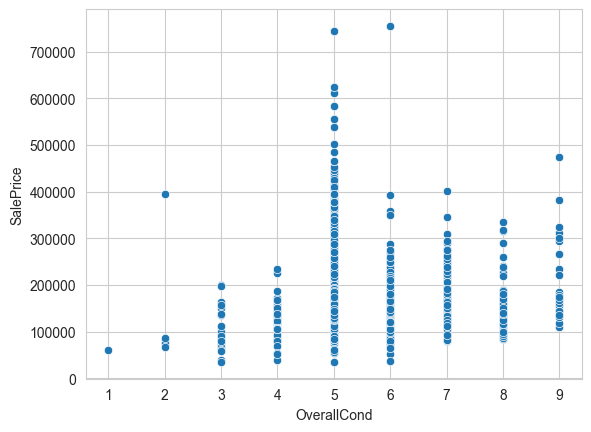

In [444]:
sns.scatterplot(data=train_df, x="OverallCond", y="SalePrice")

In [445]:
train_df.query("OverallCond==5 & SalePrice > 700_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [446]:
outliers_to_remove.append(1182)

In [447]:
train_df.query("OverallCond==6 & SalePrice > 700_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [448]:
outliers_to_remove.append(691)

In [449]:
train_df.query("OverallCond==2 & SalePrice > 300_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432


In [450]:
outliers_to_remove.append(378)

In [451]:
train_df.query("OverallCond==9 & SalePrice > 400_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [452]:
outliers_to_remove.append(185)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

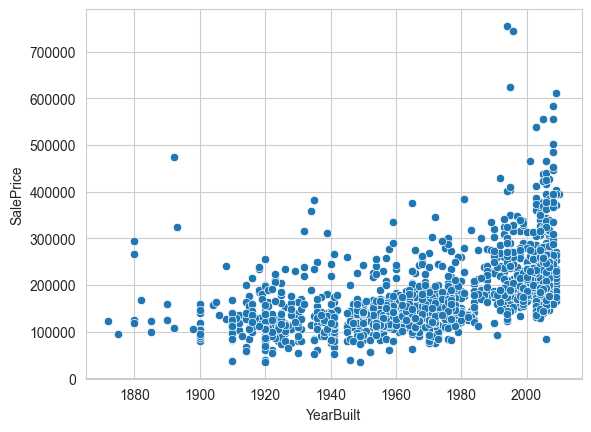

In [453]:
sns.scatterplot(data=train_df, x="YearBuilt", y="SalePrice")

In [454]:
train_df.query("YearBuilt < 1900 & SalePrice > 200_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979


In [455]:
outliers_to_remove.append(185)
outliers_to_remove.append(304)
outliers_to_remove.append(583)
outliers_to_remove.append(747)

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

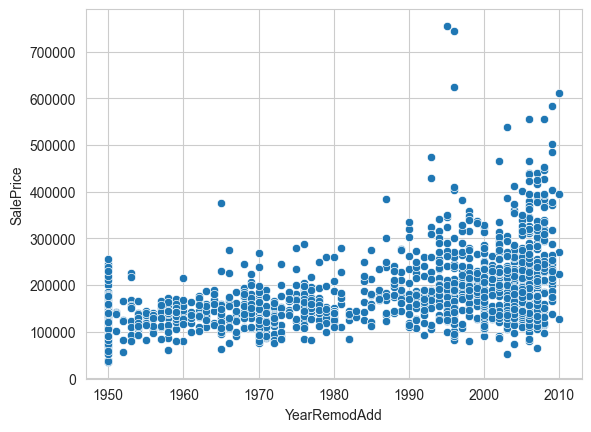

In [456]:
sns.scatterplot(data=train_df, x="YearRemodAdd", y="SalePrice")

In [457]:
train_df.query("YearRemodAdd < 1970 & SalePrice > 300_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


In [458]:
outliers_to_remove.append(313)

In [459]:
train_df.query("YearRemodAdd < 2000 & SalePrice > 600_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [460]:
outliers_to_remove.append(691)
outliers_to_remove.append(1169)
outliers_to_remove.append(1182)

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

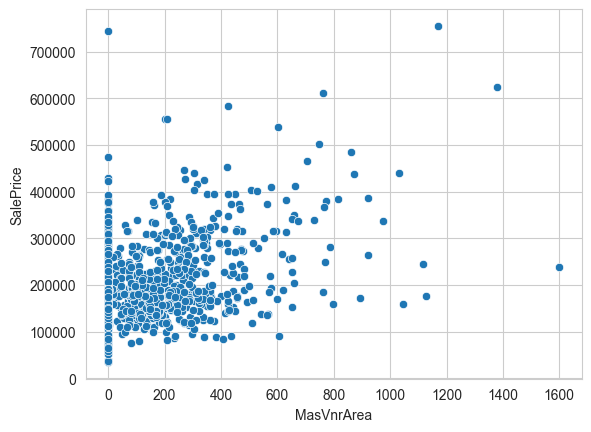

In [461]:

sns.scatterplot(data=train_df, x="MasVnrArea", y="SalePrice")

In [462]:
train_df.query("MasVnrArea > 1000 & SalePrice < 300_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
70,71,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000
115,116,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,176000
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
808,809,80,RL,85.0,13400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2006,WD,Normal,159950


In [463]:
outliers_to_remove.append(70)
outliers_to_remove.append(115)
outliers_to_remove.append(297)
outliers_to_remove.append(808)

In [464]:
train_df.query("MasVnrArea > 1200 | SalePrice > 700_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [465]:
outliers_to_remove.append(297)
outliers_to_remove.append(691)
outliers_to_remove.append(1169)
outliers_to_remove.append(1182)

<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

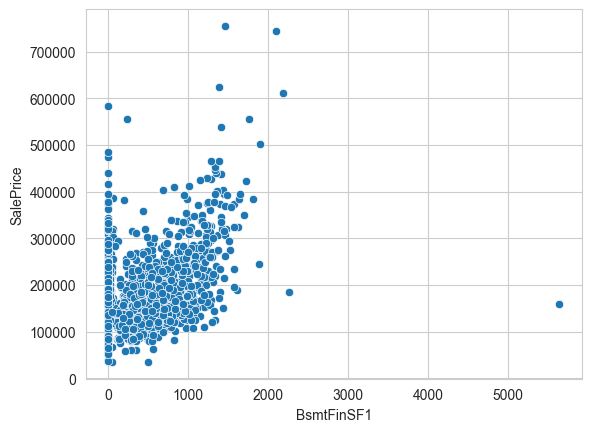

In [466]:
sns.scatterplot(data=train_df, x="BsmtFinSF1", y="SalePrice")


In [467]:
train_df.query("BsmtFinSF1 > 2000 & SalePrice < 300_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [468]:
outliers_to_remove.append(523)
outliers_to_remove.append(1298)

<Axes: xlabel='BsmtFinSF2', ylabel='SalePrice'>

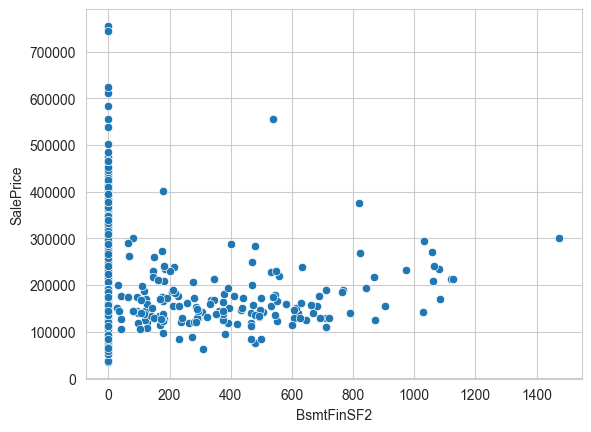

In [469]:
sns.scatterplot(data=train_df, x="BsmtFinSF2", y="SalePrice")

In [470]:
train_df.query("BsmtFinSF2 > 400 & SalePrice > 500_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [471]:
outliers_to_remove.append(440)

<Axes: xlabel='BsmtUnfSF', ylabel='SalePrice'>

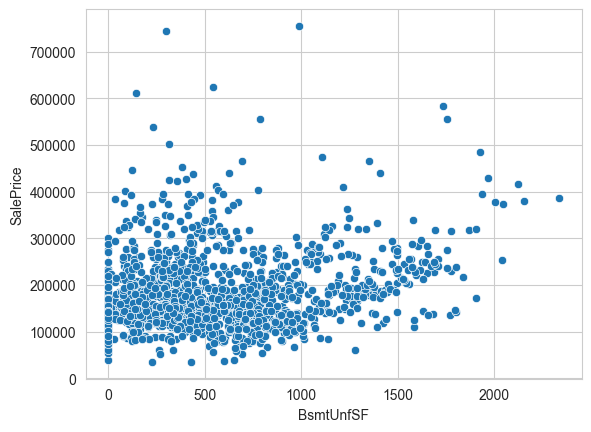

In [472]:
sns.scatterplot(data=train_df, x="BsmtUnfSF", y="SalePrice")

In [473]:
stats.zscore(train_df["BsmtUnfSF"]).sort_values().tail(10)


137     3.033082
798     3.076096
774     3.096471
496     3.173444
1267    3.248152
581     3.338708
678     3.347764
278     3.517556
477     3.590001
224     4.004295
Name: BsmtUnfSF, dtype: float64

In [474]:
indices = stats.zscore(train_df["BsmtUnfSF"]).sort_values().tail(10).index
train_df.loc[indices, ["BsmtUnfSF", "SalePrice"]]

,BsmtUnfSF,SalePrice
137,1907,171000
798,1926,485000
774,1935,395000
496,1969,430000
1267,2002,378500
581,2042,253293
678,2046,372500
278,2121,415298
477,2153,380000
224,2336,386250


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

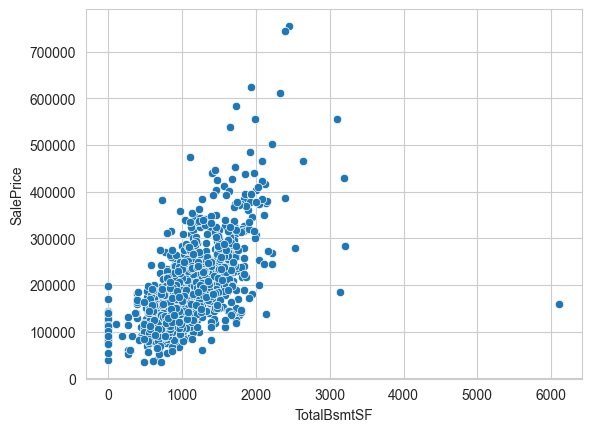

In [475]:
sns.scatterplot(data=train_df, x="TotalBsmtSF", y="SalePrice")

In [476]:
stats.zscore(train_df["TotalBsmtSF"]).sort_values().tail(10)

224      3.043108
1182     3.052229
691      3.161680
1044     3.344097
1373     3.592640
440      4.643820
523      4.744149
496      4.885522
332      4.899204
1298    11.520949
Name: TotalBsmtSF, dtype: float64

In [477]:
indices = stats.zscore(train_df["TotalBsmtSF"]).sort_values().tail(10).index
train_df.loc[indices, ["TotalBsmtSF", "SalePrice"]]


,TotalBsmtSF,SalePrice
224,2392,386250
1182,2396,745000
691,2444,755000
1044,2524,278000
1373,2633,466500
440,3094,555000
523,3138,184750
496,3200,430000
332,3206,284000
1298,6110,160000


In [478]:
outliers_to_remove.append(440)
outliers_to_remove.append(523)
outliers_to_remove.append(496)
outliers_to_remove.append(332)

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

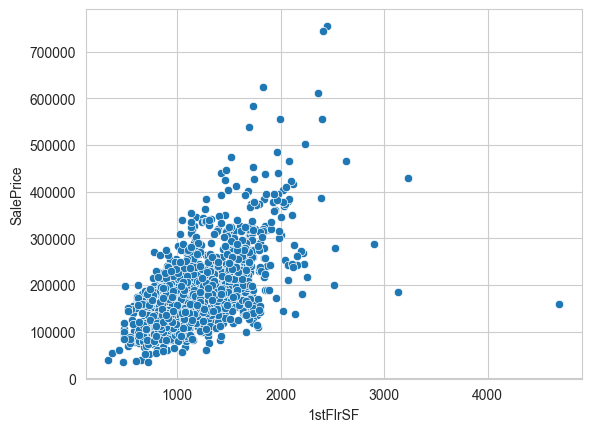

In [479]:
sns.scatterplot(data=train_df, x="1stFlrSF", y="SalePrice")

In [480]:
stats.zscore(train_df["1stFlrSF"]).sort_values().tail(10)

440     3.207029
1182    3.230317
691     3.315709
529     3.499430
1044    3.522718
1373    3.804769
1024    4.490489
523     5.111518
496     5.344404
1298    9.132681
Name: 1stFlrSF, dtype: float64

In [481]:
indices = stats.zscore(train_df["1stFlrSF"]).sort_values().tail(10).index
train_df.loc[indices, ["1stFlrSF", "SalePrice"]]


,1stFlrSF,SalePrice
440,2402,555000
1182,2411,745000
691,2444,755000
529,2515,200624
1044,2524,278000
1373,2633,466500
1024,2898,287000
523,3138,184750
496,3228,430000
1298,4692,160000


In [482]:
outliers_to_remove.append(1298)
outliers_to_remove.append(496)
outliers_to_remove.append(523)
outliers_to_remove.append(1024)
outliers_to_remove.append(1373)

<Axes: xlabel='2ndFlrSF', ylabel='SalePrice'>

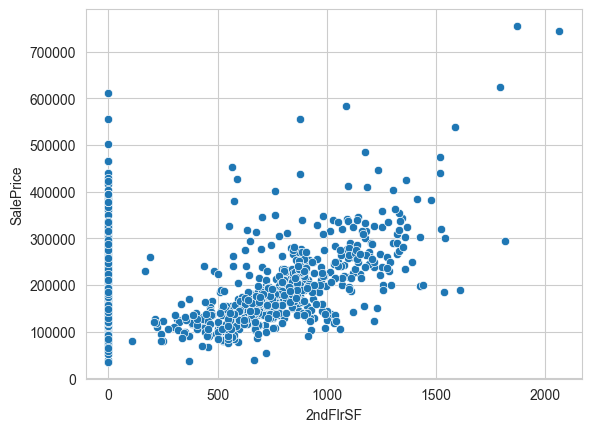

In [483]:
sns.scatterplot(data=train_df, x="2ndFlrSF", y="SalePrice")

In [484]:
stats.zscore(train_df["2ndFlrSF"]).sort_values().tail(10)

58      2.685757
118     2.694923
523     2.729297
745     2.733880
769     2.846168
1360    2.896583
1169    3.320526
304     3.370941
691     3.494687
1182    3.936963
Name: 2ndFlrSF, dtype: float64

In [485]:
indices = stats.zscore(train_df["2ndFlrSF"]).sort_values().tail(10).index
train_df.loc[indices, ["2ndFlrSF", "SalePrice"]]

,2ndFlrSF,SalePrice
58,1519,438780
118,1523,320000
523,1538,184750
745,1540,299800
769,1589,538000
1360,1611,189000
1169,1796,625000
304,1818,295000
691,1872,755000
1182,2065,745000


In [486]:
train_df.query("`2ndFlrSF`> 1500 & SalePrice < 200_000")["SalePrice"]

523     184750
1360    189000
Name: SalePrice, dtype: int64

In [487]:
outliers_to_remove.append(523)
outliers_to_remove.append(1360)

In [488]:
train_df.query("`2ndFlrSF`> 1750 & SalePrice < 300_000")["SalePrice"]

304    295000
Name: SalePrice, dtype: int64

In [489]:
outliers_to_remove.append(304)

<Axes: xlabel='LowQualFinSF', ylabel='SalePrice'>

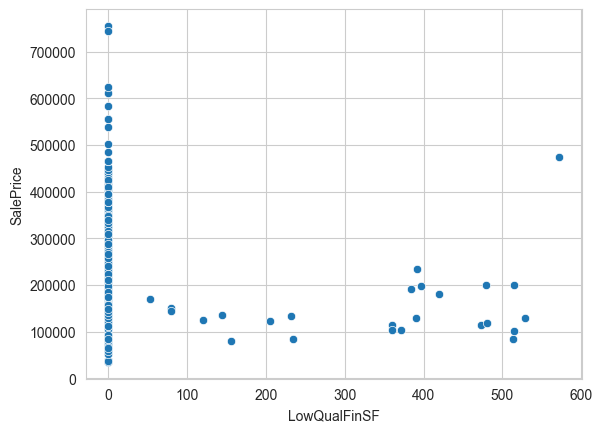

In [490]:
sns.scatterplot(data=train_df, x="LowQualFinSF", y="SalePrice")

In [491]:
train_df.query("LowQualFinSF > 550 & SalePrice > 400_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [492]:
outliers_to_remove.append(185)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

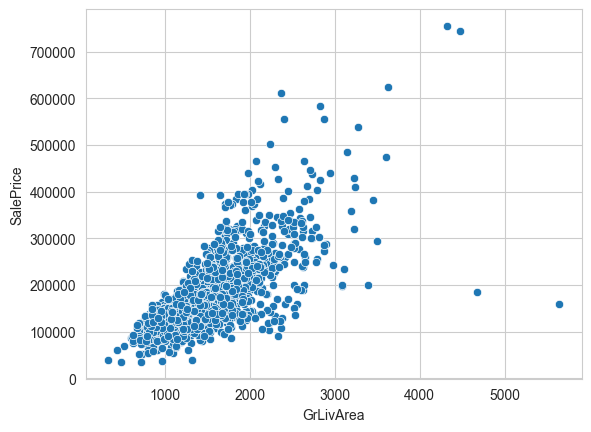

In [493]:
sns.scatterplot(data=train_df, x="GrLivArea", y="SalePrice")

In [494]:
train_df.query("GrLivArea > 4000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [495]:
outliers_to_remove.append(523)
outliers_to_remove.append(691)
outliers_to_remove.append(1182)
outliers_to_remove.append(1298)

<Axes: xlabel='BsmtFullBath', ylabel='SalePrice'>

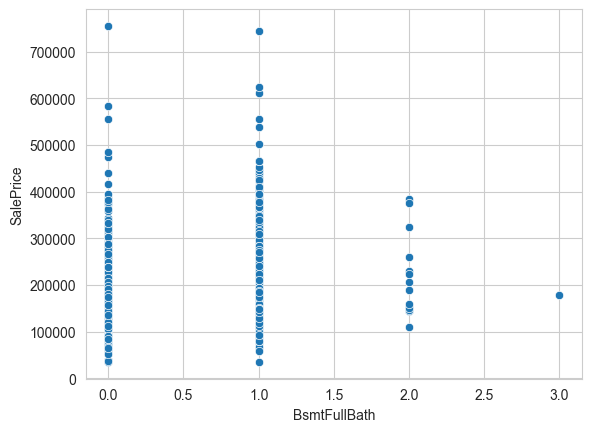

In [496]:
sns.scatterplot(data=train_df, x="BsmtFullBath", y="SalePrice")

In [497]:
train_df.query("BsmtFullBath==3")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


In [498]:
outliers_to_remove.append(738)

<Axes: xlabel='BsmtHalfBath', ylabel='SalePrice'>

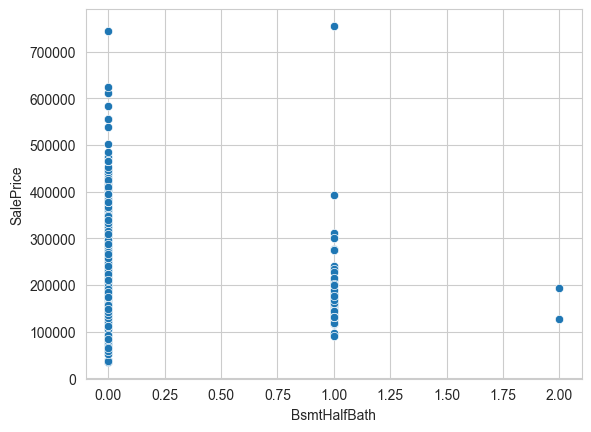

In [499]:
sns.scatterplot(data=train_df, x="BsmtHalfBath", y="SalePrice")

In [500]:
train_df.query("BsmtFullBath==3")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


In [501]:
outliers_to_remove.append(738)

<Axes: xlabel='FullBath', ylabel='SalePrice'>

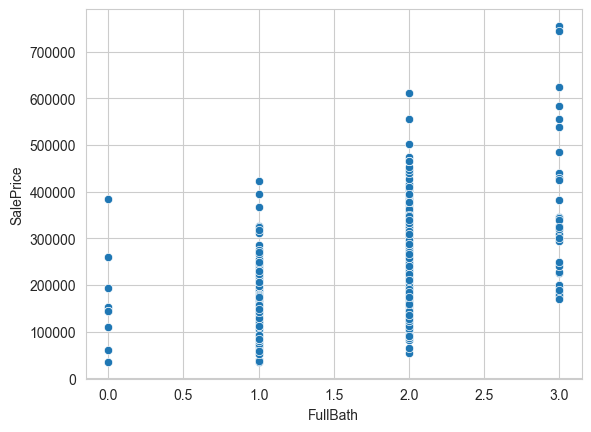

In [502]:
sns.scatterplot(data=train_df, x="FullBath", y="SalePrice")

In [503]:
train_df.query("FullBath==2 & SalePrice >= 500_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657


In [504]:
stats.zscore(train_df["FullBath"]).sort_values().tail(10)

1360    2.605522
1169    2.605522
137     2.605522
320     2.605522
1046    2.605522
1182    2.605522
1142    2.605522
304     2.605522
1245    2.605522
1268    2.605522
Name: FullBath, dtype: float64

In [505]:
indices = stats.zscore(train_df["FullBath"]).sort_values().tail(10).index
train_df.loc[indices, ["FullBath", "SalePrice"]]

,FullBath,SalePrice
1360,3,189000
1169,3,625000
137,3,171000
320,3,342643
1046,3,556581
1182,3,745000
1142,3,424870
304,3,295000
1245,3,178000
1268,3,381000


<Axes: xlabel='HalfBath', ylabel='SalePrice'>

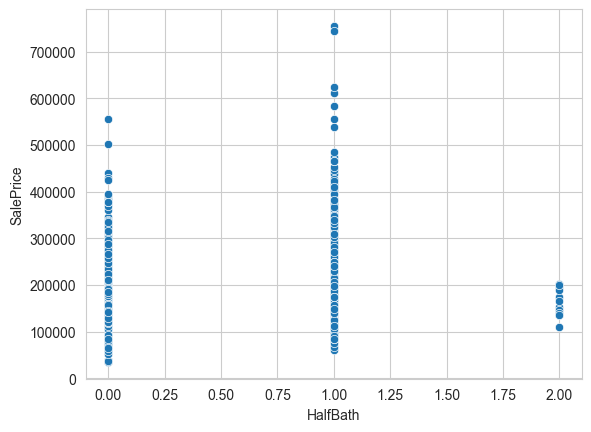

In [506]:
sns.scatterplot(data=train_df, x="HalfBath", y="SalePrice")

<Axes: xlabel='BedroomAbvGr', ylabel='SalePrice'>

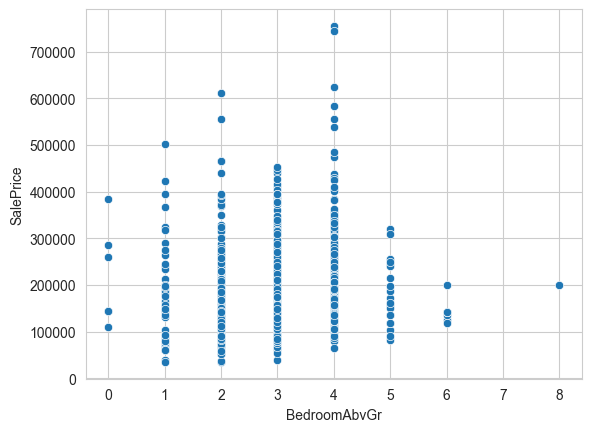

In [507]:
sns.scatterplot(data=train_df, x="BedroomAbvGr", y="SalePrice")

In [508]:
train_df.query("BedroomAbvGr==8")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [509]:
outliers_to_remove.append(635)

In [510]:
train_df.query("BedroomAbvGr==2 & SalePrice > 500_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657


In [511]:
outliers_to_remove.append(440)
outliers_to_remove.append(898)

In [512]:
train_df.query("BedroomAbvGr==1 & SalePrice > 450_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837


In [513]:
outliers_to_remove.append(178)

<Axes: xlabel='KitchenAbvGr', ylabel='SalePrice'>

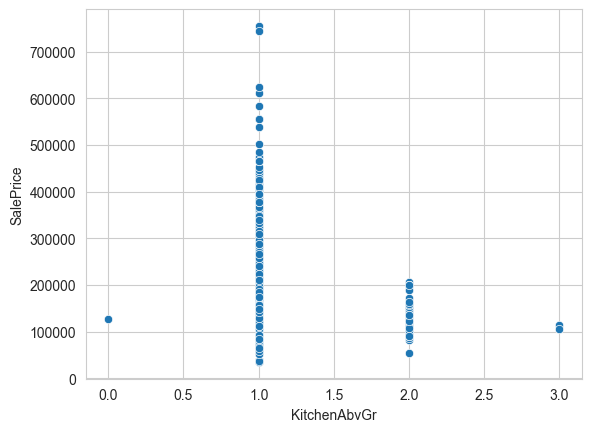

In [514]:
sns.scatterplot(data=train_df, x="KitchenAbvGr", y="SalePrice")

In [515]:
stats.zscore(train_df["KitchenAbvGr"]).sort_values().tail(10)

1292    4.328579
1350    4.328579
1090    4.328579
1416    4.328579
1266    4.328579
1216    4.328579
984     4.328579
943     4.328579
48      8.868612
809     8.868612
Name: KitchenAbvGr, dtype: float64

In [516]:
indices = stats.zscore(train_df["KitchenAbvGr"]).sort_values().tail(10).index
train_df.loc[indices, ["KitchenAbvGr", "SalePrice"]]

,KitchenAbvGr,SalePrice
1292,2,107500
1350,2,200000
1090,2,92900
1416,2,122500
1266,2,122000
1216,2,112000
984,2,126000
943,2,143000
48,3,113000
809,3,106000


In [517]:
outliers_to_remove.append(809)
outliers_to_remove.append(48)
outliers_to_remove.append(441)

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

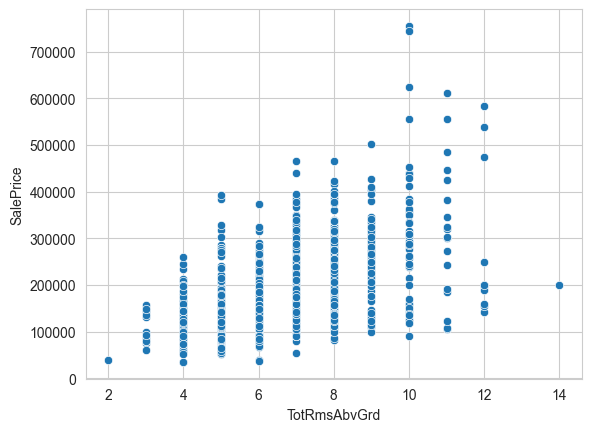

In [518]:
sns.scatterplot(data=train_df, x="TotRmsAbvGrd", y="SalePrice")

In [519]:
stats.zscore(train_df["TotRmsAbvGrd"]).sort_values().tail(10)

1298    3.373996
910     3.373996
1230    3.373996
1031    3.373996
1173    3.373996
1350    3.373996
769     3.373996
1386    3.373996
803     3.373996
635     4.604889
Name: TotRmsAbvGrd, dtype: float64

In [520]:
indices = stats.zscore(train_df["TotRmsAbvGrd"]).sort_values().tail(10).index
train_df.loc[indices, ["TotRmsAbvGrd", "SalePrice"]]

,TotRmsAbvGrd,SalePrice
1298,12,160000
910,12,154300
1230,12,190000
1031,12,197000
1173,12,200500
1350,12,200000
769,12,538000
1386,12,250000
803,12,582933
635,14,200000


In [521]:
outliers_to_remove.append(635)
outliers_to_remove.append(769)
outliers_to_remove.append(803)
outliers_to_remove.append(185)

<Axes: xlabel='Fireplaces', ylabel='SalePrice'>

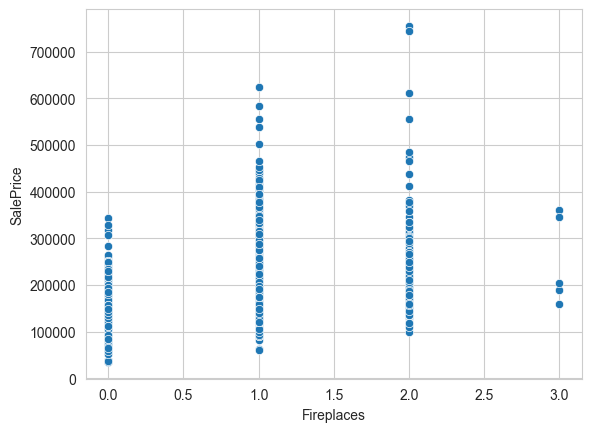

In [522]:
sns.scatterplot(data=train_df, x="Fireplaces", y="SalePrice")

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

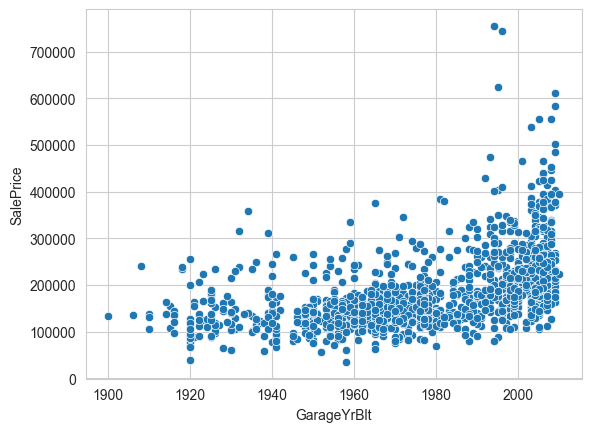

In [523]:
sns.scatterplot(data=train_df, x="GarageYrBlt", y="SalePrice")

In [524]:
train_df.query("SalePrice > 600_000 & GarageYrBlt < 2000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [525]:
outliers_to_remove.append(691)
outliers_to_remove.append(1169)
outliers_to_remove.append(1182)

In [526]:
train_df.query("SalePrice > 200_000 & GarageYrBlt < 1910")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
848,849,50,RL,75.0,45600,Pave,NaN,IR2,Bnk,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,240000


In [527]:
outliers_to_remove.append(848)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

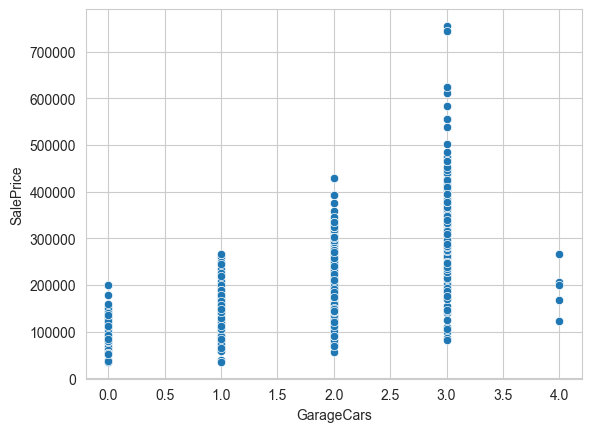

In [528]:
sns.scatterplot(data=train_df, x="GarageCars", y="SalePrice")

In [529]:
train_df.query("SalePrice > 700_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [530]:
outliers_to_remove.append(691)
outliers_to_remove.append(1182)

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

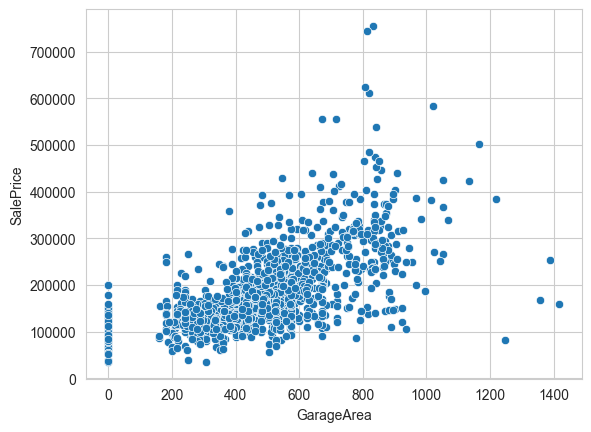

In [531]:
sns.scatterplot(data=train_df, x="GarageArea", y="SalePrice")

In [532]:
train_df.query("GarageArea > 1200")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [533]:
outliers_to_remove.append(581)
outliers_to_remove.append(825)
outliers_to_remove.append(1061)
outliers_to_remove.append(1190)
outliers_to_remove.append(1298)
outliers_to_remove.append(691)
outliers_to_remove.append(1182)

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

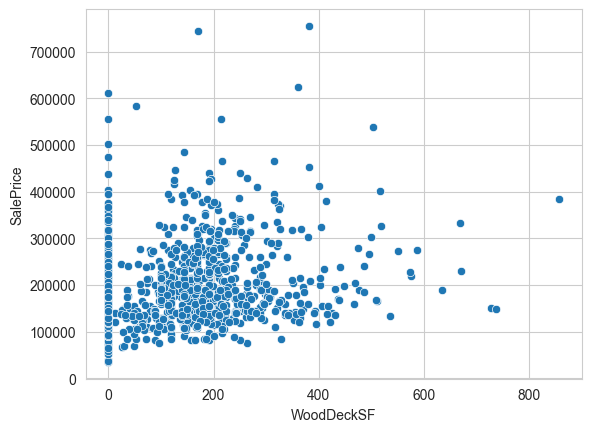

In [534]:
sns.scatterplot(data=train_df, x="WoodDeckSF", y="SalePrice")

In [535]:
stats.zscore(train_df["WoodDeckSF"]).sort_values().tail(10)

961     3.637434
169     3.828981
64      3.844943
1423    3.924754
1210    4.315829
1313    4.579205
335     4.595168
1068    5.058072
1459    5.121921
53      6.087635
Name: WoodDeckSF, dtype: float64

In [536]:
indices = stats.zscore(train_df["WoodDeckSF"]).sort_values().tail(10).index
train_df.loc[indices, ["WoodDeckSF", "SalePrice"]]

,WoodDeckSF,SalePrice
961,550,272000
169,574,228000
64,576,219500
1423,586,274970
1210,635,189000
1313,668,333168
335,670,228950
1068,728,151400
1459,736,147500
53,857,385000


In [537]:
train_df.query("WoodDeckSF > 700")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
1068,1069,160,RM,42.0,3964,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,151400
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [538]:
outliers_to_remove.append(53)
outliers_to_remove.append(1068)
outliers_to_remove.append(1459)
outliers_to_remove.append(691)
outliers_to_remove.append(1182)

<Axes: xlabel='OpenPorchSF', ylabel='SalePrice'>

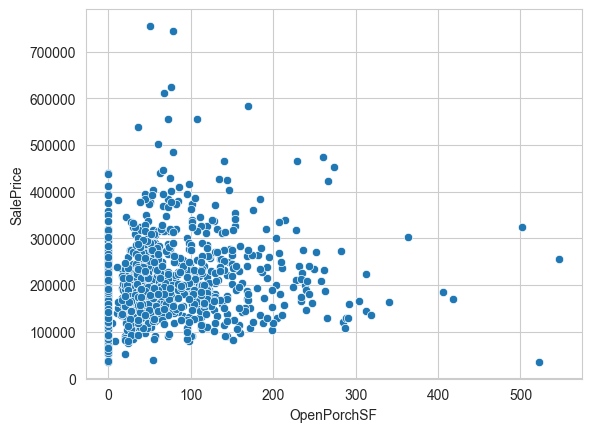

In [539]:
sns.scatterplot(data=train_df, x="OpenPorchSF", y="SalePrice")

In [540]:
train_df.query("OpenPorchSF > 350")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
854,855,20,RL,102.0,17920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,170000
875,876,60,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,303477
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


In [541]:
outliers_to_remove.append(495)
outliers_to_remove.append(523)
outliers_to_remove.append(583)
outliers_to_remove.append(854)
outliers_to_remove.append(875)
outliers_to_remove.append(1328)

<Axes: xlabel='EnclosedPorch', ylabel='SalePrice'>

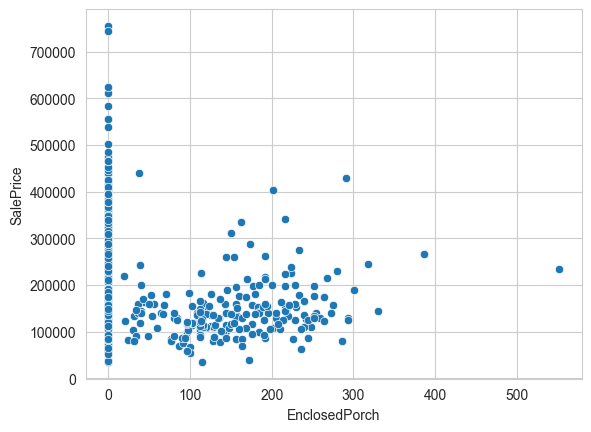

In [542]:
sns.scatterplot(data=train_df, x="EnclosedPorch", y="SalePrice")

In [543]:
stats.zscore(train_df["EnclosedPorch"]).sort_values().tail(10)

1152    4.223460
1326    4.321663
496     4.403498
630     4.436233
358     4.452600
1360    4.567169
939     4.845410
1197    5.041815
747     5.958372
197     8.675309
Name: EnclosedPorch, dtype: float64

In [544]:
indices = stats.zscore(train_df["EnclosedPorch"]).sort_values().tail(10).index
train_df.loc[indices, ["EnclosedPorch", "SalePrice"]]

,EnclosedPorch,SalePrice
1152,280,230000
1326,286,79000
496,291,430000
630,293,124000
358,294,130000
1360,301,189000
939,318,244400
1197,330,144000
747,386,265979
197,552,235000


In [545]:
outliers_to_remove.append(197)
outliers_to_remove.append(747)
outliers_to_remove.append(496)

<Axes: xlabel='3SsnPorch', ylabel='SalePrice'>

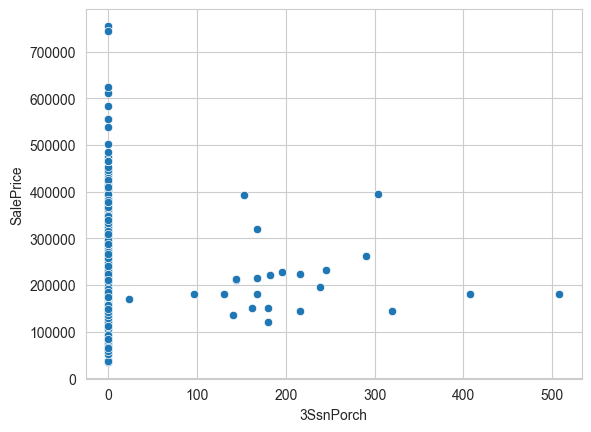

In [546]:
sns.scatterplot(data=train_df, x="3SsnPorch", y="SalePrice")

In [547]:
stats.zscore(train_df["3SsnPorch"]).sort_values().tail(10)

280      6.571417
1161     7.253841
1080     7.253841
237      8.004507
258      8.243356
1346     9.778810
1437    10.256507
5       10.802446
55      13.770991
205     17.217233
Name: 3SsnPorch, dtype: float64

In [548]:
indices = stats.zscore(train_df["3SsnPorch"]).sort_values().tail(10).index
train_df.loc[indices, ["3SsnPorch", "SalePrice"]]

,3SsnPorch,SalePrice
280,196,228500
1161,216,224000
1080,216,145000
237,238,194500
258,245,231500
1346,290,262500
1437,304,394617
5,320,143000
55,407,180500
205,508,180500


In [549]:
outliers_to_remove.append(205)
outliers_to_remove.append(55)
outliers_to_remove.append(5)
outliers_to_remove.append(1437)

<Axes: xlabel='ScreenPorch', ylabel='SalePrice'>

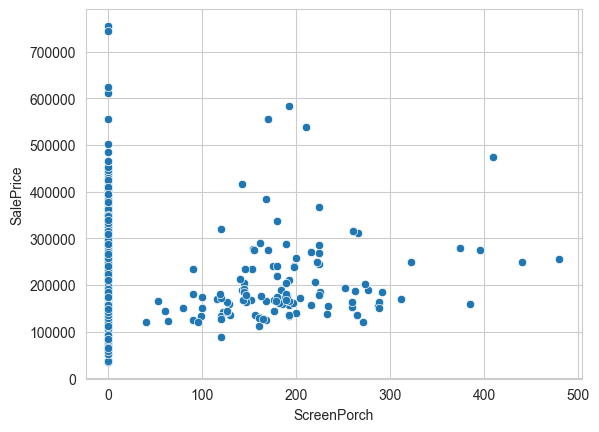

In [550]:
sns.scatterplot(data=train_df, x="ScreenPorch", y="SalePrice")

In [551]:
train_df.query("ScreenPorch>350")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
359,360,60,RL,78.0,12011,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,280000
426,427,80,RL,NaN,12800,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,275000
625,626,20,RL,87.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,160000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000


In [552]:
outliers_to_remove.append(185)
outliers_to_remove.append(359)
outliers_to_remove.append(426)
outliers_to_remove.append(625)
outliers_to_remove.append(1328)
outliers_to_remove.append(1386)

In [553]:
train_df.query("ScreenPorch > 100 & SalePrice > 500_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933


In [554]:
outliers_to_remove.append(440)
outliers_to_remove.append(769)
outliers_to_remove.append(803)

<Axes: xlabel='PoolArea', ylabel='SalePrice'>

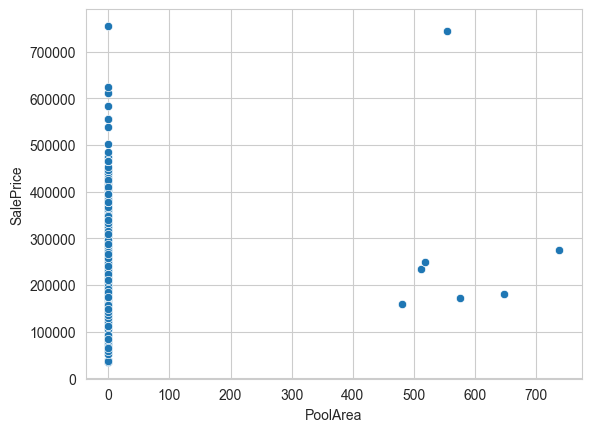

In [555]:
sns.scatterplot(data=train_df, x="PoolArea", y="SalePrice")

<Axes: xlabel='MiscVal', ylabel='SalePrice'>

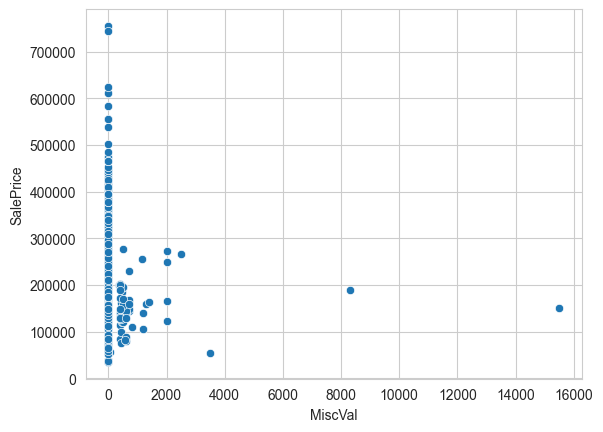

In [556]:
sns.scatterplot(data=train_df, x="MiscVal", y="SalePrice")

In [557]:
train_df.query("MiscVal > 3000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500
705,706,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000


In [558]:
outliers_to_remove.append(346)
outliers_to_remove.append(705)
outliers_to_remove.append(1230)

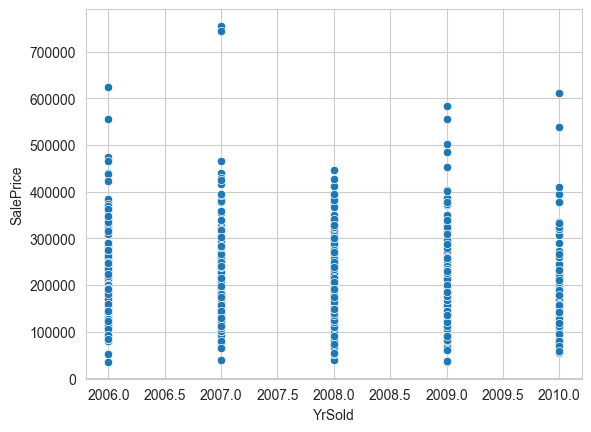

In [559]:
sns.scatterplot(data=train_df, x="YrSold", y="SalePrice");

In [560]:
train_df.query("YrSold == 2006 & SalePrice > 500_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


In [561]:
outliers_to_remove.append(1046)
outliers_to_remove.append(1169)

In [562]:
train_df.query("YrSold == 2010 & SalePrice > 500_000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657


In [563]:
outliers_to_remove.append(769)
outliers_to_remove.append(898)

In [564]:
from collections import Counter

counter = Counter(outliers_to_remove)
counter

Counter({691: 9,
         1182: 9,
         1298: 7,
         523: 7,
         185: 5,
         769: 4,
         1169: 4,
         440: 4,
         496: 3,
         313: 2,
         304: 2,
         583: 2,
         747: 2,
         297: 2,
         738: 2,
         635: 2,
         898: 2,
         803: 2,
         1328: 2,
         934: 1,
         249: 1,
         335: 1,
         451: 1,
         706: 1,
         457: 1,
         378: 1,
         70: 1,
         115: 1,
         808: 1,
         332: 1,
         1024: 1,
         1373: 1,
         1360: 1,
         178: 1,
         809: 1,
         48: 1,
         441: 1,
         848: 1,
         581: 1,
         825: 1,
         1061: 1,
         1190: 1,
         53: 1,
         1068: 1,
         1459: 1,
         495: 1,
         854: 1,
         875: 1,
         197: 1,
         205: 1,
         55: 1,
         5: 1,
         1437: 1,
         359: 1,
         426: 1,
         625: 1,
         1386: 1,
         346: 1,
       

In [565]:
row_idx_to_remove = np.unique(outliers_to_remove)
row_idx_to_remove
train_df = train_df[train_df.index.isin(row_idx_to_remove)==False]

In [566]:
train_df.dtypes[train_df.dtypes != 'object']
#train_df.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

## 1.3 Handling of missing values

In [567]:
train_df.isnull().sum().sort_values(ascending=False)

PoolQC           1396
MiscFeature      1354
Alley            1313
Fence            1128
MasVnrType        840
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

<Axes: xlabel='BsmtFinType2', ylabel='SalePrice'>

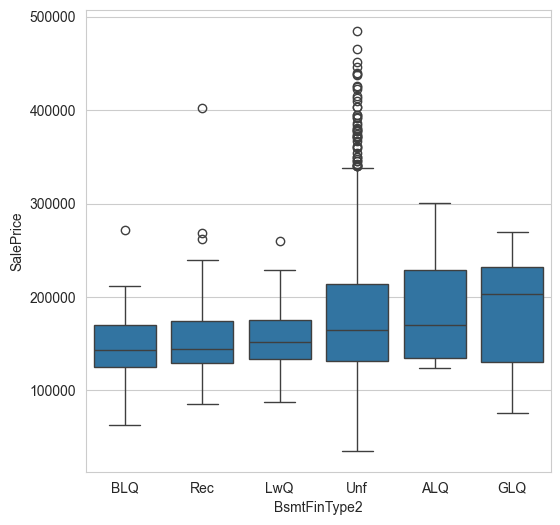

In [568]:
median_order = (
    train_df.groupby("BsmtFinType2")["SalePrice"]
    .median()
    .sort_values()
    .index
)
plt.figure(figsize=(6,6))
sns.boxplot(data=train_df, x="BsmtFinType2", y="SalePrice", order=median_order)

### Interpreting NA values

* PoolQC : NA means No Pool. NA will be replaced with 'N'.
* MiscFeature : NA means no specific distinctive feature. NA will be replaced with 'N'.
* Alley : NA means no alley access. NA will be replaced with 'N'.
* Fence : NA means no fence. NA will be replaced with 'N'.
* MasVnrType : NA means there is no masonry veneer. NA will be replaced with 'N'.
* FireplaceQu : NA means there are no fireplaces. NA will be replaced with 'N'.
* LotFrontage : NA means there isn't a street directly connected to the house. NA will be replaced with 'N'.
* GarageYrBlt : NA means the house doesn't have a garage. NA will be replaced with 'N'.
* GarageCond : NA means the house doesn't have a garage. NA will be replaced with 'N'.
* GarageType : NA means the house doesn't have a garage. NA will be replaced with 'N'.
* GarageFinish : NA means the house doesn't have a garage. NA will be replaced with 'N'.
* GarageQual : NA means the house doesn't have a garage. NA will be replaced with 'N'.
* BsmtExposure : NA means the house doesn't have a basement. NA will be replaced with 'N'.
* BsmtQual : NA means the house doesn't have a garage. NA will be replaced with 'N'.
* BsmtCond : NA means the house doesn't have a garage. NA will be replaced with 'N'.
* BsmtFinType1 : NA means the house doesn't have a garage. NA will be replaced with 'N'.
* BsmtFinType2 : NA means the house doesn't have a garage. NA will be replaced with 'N'.
* MasVnrArea : NA means the house doesn't have a masonry veneer. NA will be replaced with 0.
* Electrical : NA means there is a missing values. The missing value will be imputed using the most 
frequent value for the neighborhood to which the house belongs


### Replacing NA values for categorical columns

In [569]:
categorical_cols_na_map = {
    "PoolQC" : 'N',
    "MiscFeature" : 'N',
    "Alley" : 'N',
    "Fence" : 'N',
    "MasVnrType" : 'N',
    "FireplaceQu" : 'N',
    "GarageCond" : 'N',
    "GarageType" : 'N',
    "GarageFinish" : 'N',
    "GarageQual" : 'N',
    "BsmtExposure" : 'N',
    "BsmtQual" : 'N',
    "BsmtCond" : 'N',
    "BsmtFinType1" : 'N',
    "BsmtFinType2" : "N"
}

for col_name, value in categorical_cols_na_map.items():
    train_df.fillna({col_name : value}, inplace=True)
    


### Replacing NA values for numerical columns

In [570]:
mas_veneer_area = np.where(train_df["MasVnrArea"].isna(), 0, train_df["MasVnrArea"])
train_df["MasVnrArea"] = mas_veneer_area

lot_frontage = np.where(train_df["LotFrontage"].isna(), 0, train_df["LotFrontage"])
train_df["LotFrontage"] = lot_frontage


most_frequent_type = train_df['Electrical'].mode()[0]
train_df.fillna({"Electrical" : most_frequent_type}, inplace=True)

In [571]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head()

,0
GarageYrBlt,75
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0


## 1.4 Features Removal

In [572]:
train_df = train_df.drop(columns=["PoolQC",         # too many missing values
                                  "Alley",          # too many missing values
                                  "GarageYrBlt",   # highly correlated with other garage features / redundant
                                  "Fence",          # too many houses not having a fence
                                  "MiscFeature",    # too many missing values
                                  "Id",             # not needed
                                  "BsmtFinType2",   # no significant importance based on boxplot chart
                                  ])

test_df = test_df.drop(columns=[  "PoolQC",  # too many missing values
                                  "Alley",  # too many missing values
                                  "GarageYrBlt",  # highly correlated with other garage features / redundant
                                  "Fence",  # too many houses not having a fence
                                  "MiscFeature",  # too many missing values
                                  "Id",  # not needed
                                  "BsmtFinType2",  # no significant importance based on boxplot chart
                                  ])

## 1.5 Feature Engineering

In [573]:
train_df["houseAge"] = train_df["YrSold"] - train_df["YearBuilt"]
test_df["houseAge"] = test_df["YrSold"] - test_df["YearBuilt"]

In [574]:
train_df["houseRemodelAge"] = train_df["YrSold"] - train_df["YearRemodAdd"]
test_df["houseRemodelAge"] = test_df["YrSold"] - test_df["YearRemodAdd"]

In [575]:
train_df["totalSqFeet"] = train_df["1stFlrSF"] + train_df["2ndFlrSF"] + train_df["BsmtFinSF1"] + train_df["BsmtFinSF2"]
test_df["totalSqFeet"] = test_df["1stFlrSF"] + test_df["2ndFlrSF"] + test_df["BsmtFinSF1"] + test_df["BsmtFinSF2"]

In [576]:
train_df["totalArea"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]
test_df["totalArea"] = test_df["GrLivArea"] + test_df["TotalBsmtSF"]

In [577]:
train_df["totalBaths"] = train_df["BsmtFullBath"] + train_df["FullBath"] + 0.5 * train_df["HalfBath"] + 0.5 * train_df["BsmtHalfBath"]
test_df["totalBaths"] = test_df["BsmtFullBath"] + test_df["FullBath"] + 0.5 * test_df["HalfBath"] + 0.5 * test_df["BsmtHalfBath"]

In [578]:
train_df["totalPorchSF"] = train_df["OpenPorchSF"] + train_df["3SsnPorch"] + train_df["EnclosedPorch"] + train_df["ScreenPorch"]
test_df["totalPorchSF"] = test_df["OpenPorchSF"] + test_df["3SsnPorch"] + test_df["EnclosedPorch"] + test_df["ScreenPorch"]

In [579]:
train_df = train_df.drop(columns=[
                                    "YrSold", 
                                    "YearBuilt",
                                    "YearRemodAdd",
                                    "1stFlrSF", 
                                    "2ndFlrSF", 
                                    "BsmtFinSF1", 
                                    "BsmtFinSF2", 
                                    "GrLivArea", 
                                    "TotalBsmtSF", 
                                    "BsmtFullBath",
                                    "FullBath", 
                                    "HalfBath", 
                                    "BsmtHalfBath",
                                    "OpenPorchSF",
                                    "3SsnPorch",
                                    "EnclosedPorch",
                                    "ScreenPorch"
                                  ])

test_df = test_df.drop(columns=[
                                    "YrSold",
                                    "YearBuilt",
                                    "YearRemodAdd",
                                    "1stFlrSF",
                                    "2ndFlrSF",
                                    "BsmtFinSF1",
                                    "BsmtFinSF2",
                                    "GrLivArea",
                                    "TotalBsmtSF",
                                    "BsmtFullBath",
                                    "FullBath",
                                    "HalfBath",
                                    "BsmtHalfBath",
                                    "OpenPorchSF",
                                    "3SsnPorch",
                                    "EnclosedPorch",
                                    "ScreenPorch"
                                ])

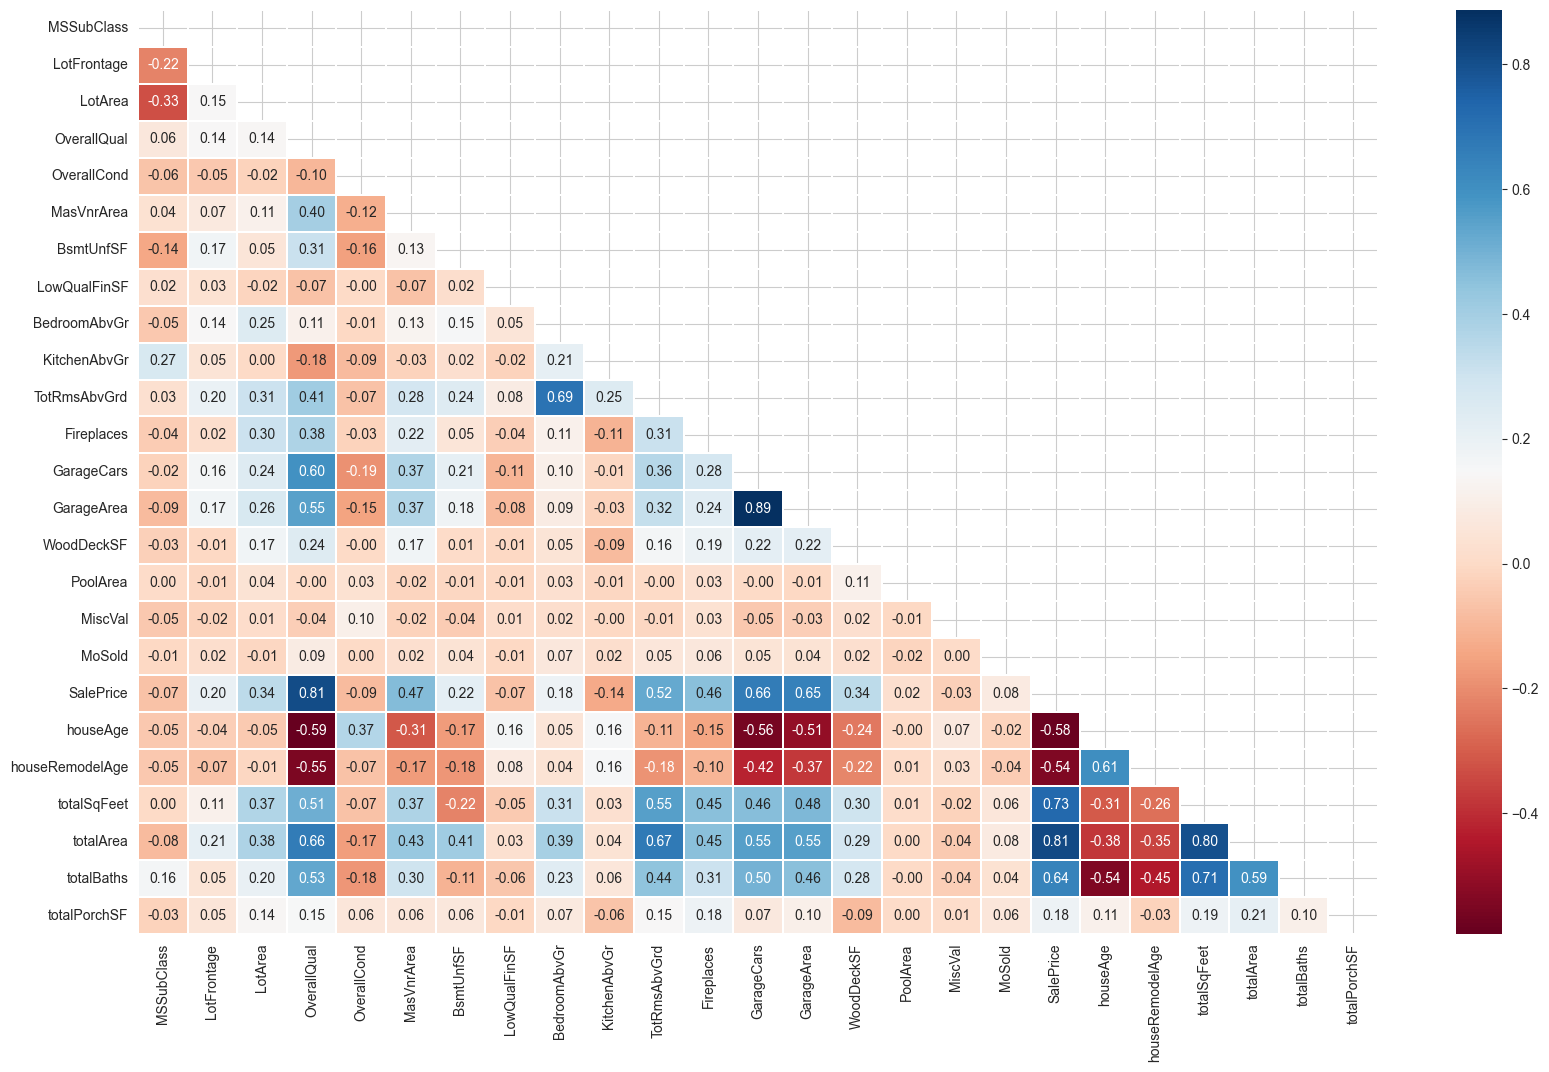

In [580]:
corr_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=[20,12])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(data=corr_matrix,
            annot=True,
            fmt=".2f",
            linewidth=1.4,
            cmap="RdBu",
            mask = mask
            )
plt.show()

In [581]:
# drop garageArea
train_df.drop(columns="GarageArea", inplace=True)
test_df.drop(columns="GarageArea", inplace=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

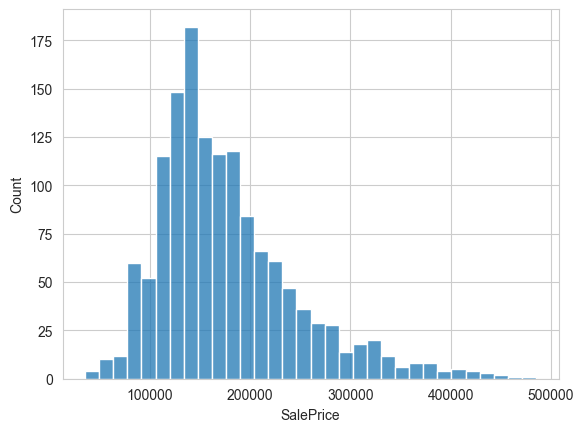

In [582]:
sns.histplot(train_df, x=train_df["SalePrice"])

In [583]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Count'>

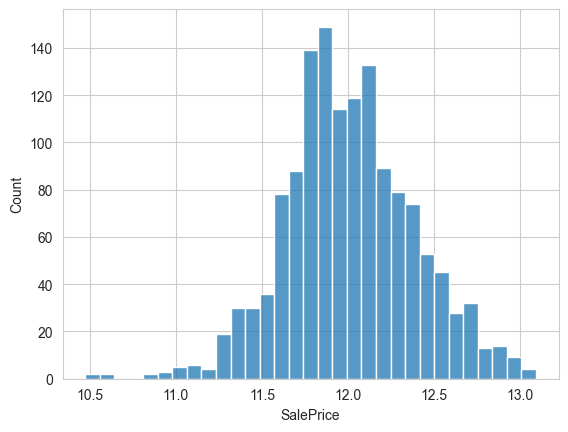

In [584]:
sns.histplot(train_df, x=train_df["SalePrice"])

## 1.6 Features Encoding

### Encoding type selection for categorical features

In [585]:
train_df.dtypes[train_df.dtypes=="object"]

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [586]:
# ordinal encoding will be applied to columns for which order does have a significance : 
# example : KitchenQuality. Ex > Good > Typical/Average > Fair > Poor
ord_encoded_cols = ["LotShape",
                    "LandContour",
                    "Utilities",
                    "LandSlope",
                    "BsmtQual",
                    "BsmtCond",
                    "BsmtExposure",
                    "BsmtFinType1",
                    "HeatingQC",
                    "BsmtFinType1",
                    "CentralAir",
                    "FireplaceQu",
                    "GarageFinish",
                    "GarageQual",
                    "GarageCond",
                    "PavedDrive",
                    "ExterCond",
                    "ExterQual",
                    "KitchenQual",
                    "RoofStyle",
                    "Electrical",
                    "Functional",
                    "GarageType",
                    "PavedDrive",
                    ]

In [587]:
# one hot encoding will be used for features for which one category is not inherently superior to others
# example : physical locations
one_hot_encoded_cols = ["Street",
                        "MSZoning",
                        "LotShape",
                        "LotConfig",
                        "Neighborhood",
                        "Condition1",
                        "Condition2",
                        "BldgType",
                        "HouseStyle",
                        "RoofMatl",
                        "Exterior1st",
                        "Exterior2nd",
                        "MasVnrType",
                        "Foundation",
                        "Heating",
                        "SaleType",
                        "SaleCondition"
                        ]

### Encoding numerical features

In [588]:
train_df.dtypes[train_df.dtypes!="object"]

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
WoodDeckSF           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
houseAge             int64
houseRemodelAge      int64
totalSqFeet          int64
totalArea            int64
totalBaths         float64
totalPorchSF         int64
dtype: object

In [589]:
print(train_df.dtypes[train_df.dtypes!="object"].index)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'houseAge',
       'houseRemodelAge', 'totalSqFeet', 'totalArea', 'totalBaths',
       'totalPorchSF'],
      dtype='object')


In [590]:
num_cols = train_df.dtypes[train_df.dtypes!="object"].index
# remove SalePrice from num_cols
num_cols = num_cols.drop("SalePrice")



In [591]:
print(num_cols)
print(len(num_cols))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'PoolArea', 'MiscVal', 'MoSold', 'houseAge',
       'houseRemodelAge', 'totalSqFeet', 'totalArea', 'totalBaths',
       'totalPorchSF'],
      dtype='object')
23


In [592]:
train_df[num_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,...,WoodDeckSF,PoolArea,MiscVal,MoSold,houseAge,houseRemodelAge,totalSqFeet,totalArea,totalBaths,totalPorchSF
0,60,65.0,8450,7,5,196.0,150,0,3,1,...,0,0,0,2,5,5,2416,2566,3.5,61
1,20,80.0,9600,6,8,0.0,284,0,3,1,...,298,0,0,5,31,31,2240,2524,2.5,0
2,60,68.0,11250,7,5,162.0,434,0,3,1,...,0,0,0,9,7,6,2272,2706,3.5,42
3,70,60.0,9550,7,5,0.0,540,0,3,1,...,0,0,0,2,91,36,1933,2473,2.0,307
4,60,84.0,14260,8,5,350.0,490,0,4,1,...,192,0,0,12,8,8,2853,3343,3.5,84


### Defining pipelines for data pre-processing (imputation, encoding, scaling)

In [593]:
numeric_pipeline = Pipeline(steps=[
    # ('impute', SimpleImputer(strategy="mean")),
    ('impute', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

In [594]:
ordinal_enc_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy="most_frequent")),
    ('ordEnc', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

In [595]:
one_hot_enc_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy="most_frequent")),
    ('hotEnc', OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [596]:
col_transformers = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, num_cols),
    ('ord_pipeline', ordinal_enc_pipeline, ord_encoded_cols),
    ('hot_pipeline', one_hot_enc_pipeline, one_hot_encoded_cols)
], 
    remainder="passthrough", 
    n_jobs=-1)

In [597]:
main_pipeline = Pipeline(steps=[
    ('col_transform', col_transformers),
])

### Pre-processing

In [598]:
X = train_df.drop(columns="SalePrice", axis=1)
y = train_df["SalePrice"]

In [599]:
X_preprocessed = main_pipeline.fit_transform(X)

In [600]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# 2. Modelling

## Linear Regression

In [601]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [602]:
y_pred_lr = lr.predict(X_test)

In [603]:
mean_squared_error(y_test, y_pred_lr)

0.015045813701033877

## Random Forest Regressor

In [604]:
RFR = RandomForestRegressor(random_state=43)

In [605]:
param_grid_RFR = {
    'n_estimators': [100, 200, 500],
    'max_depth' : [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [606]:
rfr_cv = GridSearchCV(estimator=RFR, 
                      param_grid=param_grid_RFR, 
                      cv=5, 
                      scoring='neg_mean_squared_error', 
                      n_jobs=-1)

In [607]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=43), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [608]:
y_pred_rfr = rfr_cv.predict(X_test)

In [609]:
y_pred_rfr

array([11.76358192, 11.48813437, 11.59002722, 11.91695026, 11.74424096,
       11.68044811, 12.24936535, 11.61394443, 11.79561765, 11.81874159,
       12.43011513, 11.88146506, 11.87461393, 11.84005283, 12.29175401,
       11.38976884, 12.17673861, 11.96970449, 12.12828674, 11.72064952,
       11.42294558, 11.76036348, 11.40860233, 12.0427991 , 11.67236331,
       11.76348689, 12.57045237, 12.00482387, 11.46604758, 11.55898073,
       11.707897  , 11.45958005, 12.09402737, 11.47936432, 11.49795181,
       12.25087144, 12.3330779 , 12.15735365, 12.1305915 , 12.28944595,
       12.18764469, 11.36640718, 12.43966158, 12.30873215, 11.72361545,
       12.17113215, 11.65932978, 12.03420582, 12.10583717, 12.37982586,
       11.9464279 , 11.50355607, 12.62869761, 11.86852117, 12.41353454,
       12.31604207, 12.09475528, 12.45615215, 11.65382795, 12.0669322 ,
       11.75420152, 12.39667582, 11.76339651, 12.42013134, 11.9488407 ,
       12.58450009, 11.83713499, 12.52146758, 12.12091237, 12.12

In [610]:
np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_rfr)))

np.float64(22606.896675558815)

In [611]:
# Root Mean Square of the best model from the grid search
np.sqrt(-1 * rfr_cv.best_score_)

np.float64(0.1290635976553116)

## Ridge regressor

In [612]:
ridge_r = Ridge(random_state=43)
param_grid_ridge = {
    "alpha": [0.05, 0.1, 3, 5, 10],
    "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag"]
}
ridge_cv = GridSearchCV(estimator=ridge_r, 
                        param_grid=param_grid_ridge, 
                        cv=5, 
                        scoring='neg_mean_squared_error', 
                        n_jobs=-1)

ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=43), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [613]:
np.sqrt(-1 * ridge_cv.best_score_)

np.float64(0.10883819215051851)

## Gradient Boosting Regressor

In [614]:
gbr = GradientBoostingRegressor(random_state=43)
param_grid_gbr = {
    "max_depth": [12, 15, 20],
    "n_estimators": [200, 300, 1000],
    "min_samples_leaf": [10, 25, 50],
    "learning_rate": [0.001, 0.01, 0.1],
    "max_features": [0.01, 0.1, 0.7]
}
gbr_cv = GridSearchCV(estimator=gbr, 
                      param_grid=param_grid_gbr, 
                      cv=5, 
                      scoring="neg_mean_squared_error", 
                      n_jobs=-1)
gbr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=43),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [615]:
np.sqrt(-1 * gbr_cv.best_score_)

np.float64(0.11177430538618345)

In [616]:
vr = VotingRegressor([('gbr', gbr_cv.best_estimator_),
                      ('rfr', rfr_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)])
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=12,
                                                       max_features=0.1,
                                                       min_samples_leaf=25,
                                                       n_estimators=1000,
                                                       random_state=43)),
                            ('rfr',
                             RandomForestRegressor(max_depth=20,
                                                   min_samples_leaf=2,
                                                   random_state=43)),
                            ('ridge',
                             Ridge(alpha=10, random_state=43, solver='sag'))])

In [617]:
y_pred_vr = vr.predict(X_test)
mean_squared_error(y_test, y_pred_vr)

0.015247244776058556

# 3. Feature importances

In [618]:

def plot_feature_importances(columns, importances, n=10, title="Feature Importances"):
    from matplotlib.pyplot import get_cmap
    
    # Prepare the data
    f_df = (
        pd.DataFrame({"features": columns, "feature_importances": importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True)
    )

    # Generate colors from the selected palette
    palette = "viridis"
    cmap = get_cmap(palette)
    colors = [cmap(i / n) for i in range(n)]  # Normalize colors to fit palette range

    # Plot the dataframe
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust size for better visibility
    top_n = f_df.loc[:n-1]
    bars = ax.barh(top_n["features"], top_n["feature_importances"], color=colors, edgecolor="black")

    # Add values at the end of bars
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.005, bar.get_y() + bar.get_height() / 2,
                f"{width:.3f}", va="center", fontsize=10)

    # Add horizontal grid lines
    ax.xaxis.grid(True, linestyle="--", alpha=0.7)

    # Set labels, title, and invert y-axis for descending order
    ax.set_xlabel("Feature Importance", fontsize=14)
    ax.set_ylabel("Features", fontsize=14)
    ax.set_title(title, fontsize=16, weight="bold")
    ax.invert_yaxis()

    # Adjust tick label size
    ax.tick_params(axis="both", which="major", labelsize=12)

    plt.tight_layout()
    plt.show()




### Plotting the feature importances of the best model found

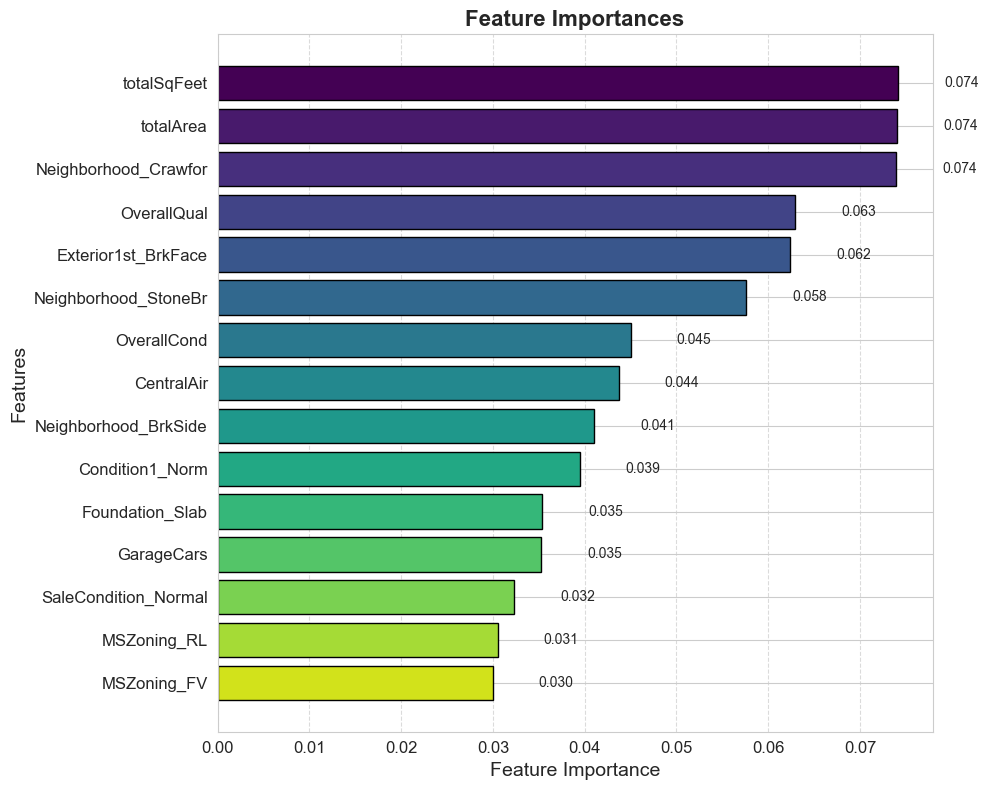

In [619]:
# Remove col transformer prefixes from column names
final_feature_names = col_transformers.get_feature_names_out()
clean_feature_names = [name.split("__")[-1] for name in final_feature_names]
# importances=rfr_cv.best_estimator_.feature_importances_
importances=ridge_cv.best_estimator_.coef_


plot_feature_importances(columns=clean_feature_names,
                         importances=importances,
                         n=15)